Set the Contrastive Function (logcosh, exp, cube)
Contrastive Function:logcosh


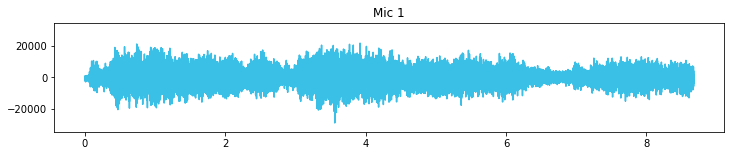

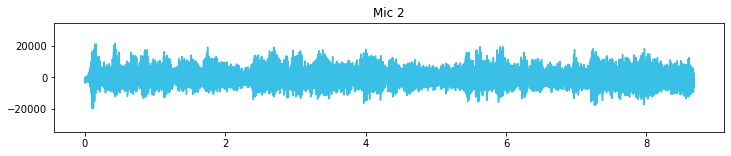

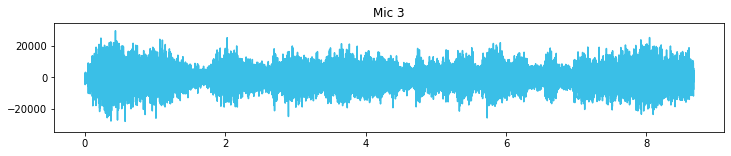

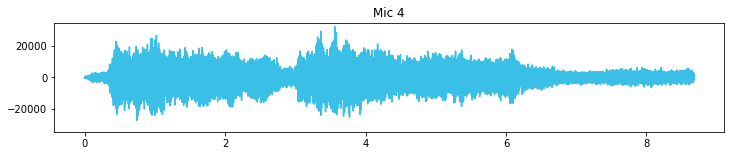

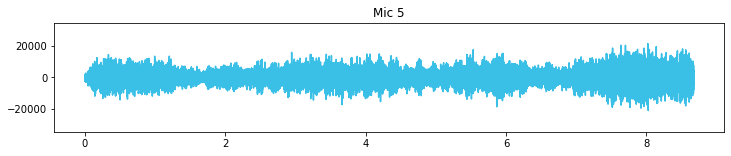

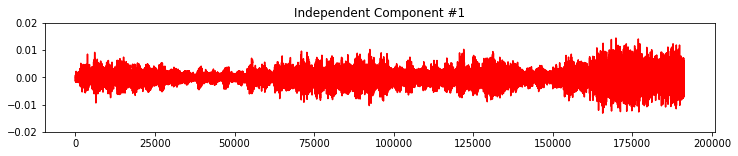

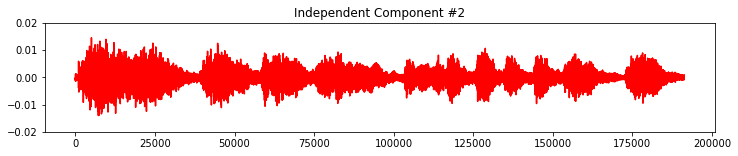

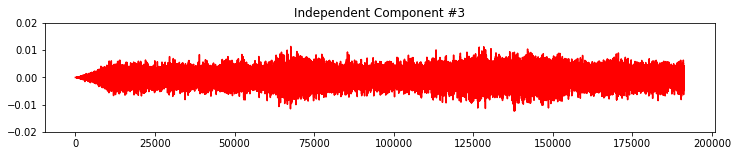

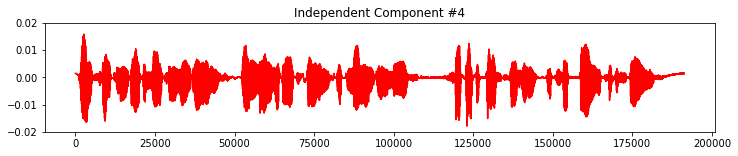

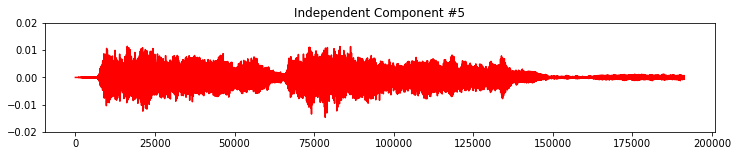

C:\Users\KEC\AppData\Local\Temp/ipykernel_22944/4147592873.py:117: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, residuals, rank,sing = np.linalg.lstsq(S, X)


[9.66756946e-03 9.38836545e-02 3.34626525e-02 8.36566316e-05
 3.01163873e-03]


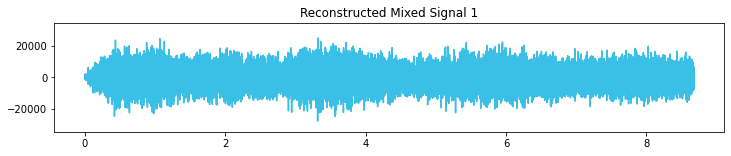

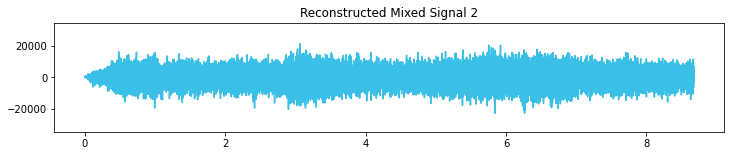

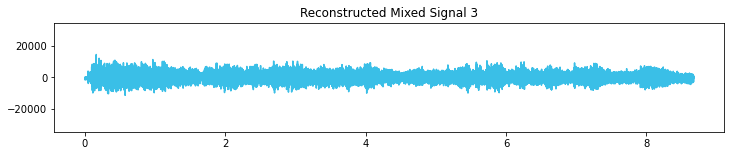

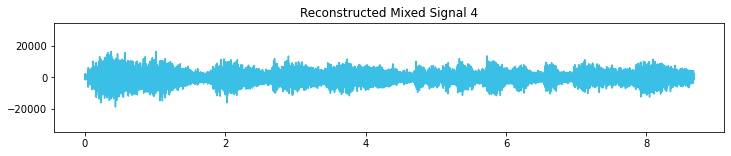

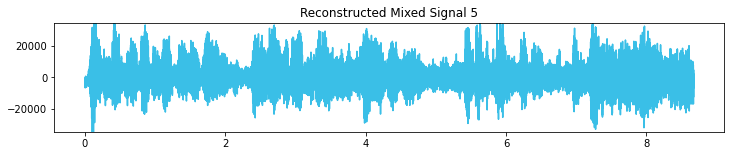

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

directory = 'C:/Users/KEC\OneDrive - University of the Philippines/MSEE/CS280/PA4/Audio_Data/Audio_Data/'

# Read the Wav Files
fs1, x1 = wavfile.read(directory + 'mic1.wav')
timing1 = np.linspace(0, len(x1)/fs1, num=len(x1))

fs2, x2 = wavfile.read(directory + 'mic2.wav')
timing2 = np.linspace(0, len(x2)/fs2, num=len(x2))

fs3, x3 = wavfile.read(directory + 'mic3.wav')
timing3 = np.linspace(0, len(x3)/fs3, num=len(x3))

fs4, x4 = wavfile.read(directory + 'mic4.wav')
timing4 = np.linspace(0, len(x4)/fs4, num=len(x4))

fs5, x5 = wavfile.read(directory + 'mic5.wav')
timing5 = np.linspace(0, len(x5)/fs5, num=len(x5))

#Plot the Wav Files
plt.figure(figsize=(12,2))
plt.title('Mic 1')
plt.plot(timing1,x1, c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Mic 2')
plt.plot(timing2,x2, c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Mic 3')
plt.plot(timing3,x3, c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Mic 4')
plt.plot(timing4,x4, c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Mic 5')
plt.plot(timing5,x5, c="#3ABFE7")
plt.ylim(-35000, 35000);

# Mixture Matrix
#X = list(zip(x1, x2, x3, x4, x5))
X = np.c_[x1, x2, x3, x4, x5]

print('Set the Contrastive Function (logcosh, exp, cube)')
con_func = input("Contrastive Function:")

# Compute ICA
ica = FastICA(n_components=5, whiten= True, fun=con_func)
S = ica.fit_transform(X) #Reconstruct Signals
A_ = ica.mixing_ #Get estimated mixing matrix

#Independent Components
s1 = S[:,0]
s2 = S[:,1]
s3 = S[:,2]
s4 = S[:,3]
s5 = S[:,4]

# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(s1, c="#FF0000")
plt.ylim(-0.020, 0.020)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(s2, c="#FF0000")
plt.ylim(-0.020, 0.020)
plt.show()

# Plot Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(s3, c="#FF0000")
plt.ylim(-0.020, 0.020)
plt.show()

# Plot Independent Component #4
plt.figure(figsize=(12,2))
plt.title('Independent Component #4')
plt.plot(s4, c="#FF0000")
plt.ylim(-0.020, 0.020)
plt.show()

# Plot Independent Component #5
plt.figure(figsize=(12,2))
plt.title('Independent Component #5')
plt.plot(s5, c="#FF0000")
plt.ylim(-0.020, 0.020)
plt.show()

# Write wave files
#fileprefix = input("Filename Prefix(Default None):" or '')

wavfile.write(directory + "shat1.wav", fs1, np.int16(s1*32767*100))
wavfile.write(directory + "shat2.wav", fs2, np.int16(s2*32767*100))
wavfile.write(directory + "shat3.wav", fs3, np.int16(s3*32767*100))
wavfile.write(directory + "shat4.wav", fs4, np.int16(s4*32767*100))
wavfile.write(directory + "shat5.wav", fs5, np.int16(s5*32767*100))


X = np.c_[x1, x2, x3, x4, x5]
S = np.c_[s1, s2, s3, s4, s5]
A, residuals, rank,sing = np.linalg.lstsq(S, X)

print(residuals)

rx = np.dot(S,A.T)

#Plot the Reconstructed Mixed Signal
plt.figure(figsize=(12,2))
plt.title('Reconstructed Mixed Signal 1')
plt.plot(timing1,rx[:,0], c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Reconstructed Mixed Signal 2')
plt.plot(timing1,rx[:,1], c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Reconstructed Mixed Signal 3')
plt.plot(timing1,rx[:,2], c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Reconstructed Mixed Signal 4')
plt.plot(timing1,rx[:,3], c="#3ABFE7")
plt.ylim(-35000, 35000);

plt.figure(figsize=(12,2))
plt.title('Reconstructed Mixed Signal 5')
plt.plot(timing1,rx[:,4], c="#3ABFE7")
plt.ylim(-35000, 35000);
 
wavfile.write(directory + "recon1.wav", fs1, np.asarray(rx[:,0] ,dtype=np.int16))
wavfile.write(directory + "recon2.wav", fs2, np.asarray(rx[:,1] ,dtype=np.int16))
wavfile.write(directory + "recon3.wav", fs3, np.asarray(rx[:,2] ,dtype=np.int16))
wavfile.write(directory + "recon4.wav", fs4, np.asarray(rx[:,3] ,dtype=np.int16))
wavfile.write(directory + "recon5.wav", fs5, np.asarray(rx[:,4] ,dtype=np.int16))

